<a href="https://colab.research.google.com/github/Karandeep07/Weapon-Detection/blob/main/gun_rifle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test lite3 with train_whole_model =true & false

REDO with batch size 8 or less
  not enough resources (error happened for evaluate)

# **Small Dataset**

200/class - pistol

400 - rifle


In [ ]:
!pip install -q --use-deprecated=legacy-resolver tflite-model-maker
!pip install -q pycocotools

     |████████████████████████████████| 616 kB 13.0 MB/s 
     |████████████████████████████████| 87 kB 6.4 MB/s 
     |████████████████████████████████| 237 kB 36.5 MB/s 
     |████████████████████████████████| 120 kB 7.5 MB/s 
     |████████████████████████████████| 6.4 MB 31.4 MB/s 
     |████████████████████████████████| 1.1 MB 4.3 MB/s 
     |████████████████████████████████| 1.1 MB 38.6 MB/s 
     |████████████████████████████████| 1.2 MB 42.0 MB/s 
     |████████████████████████████████| 840 kB 35.0 MB/s 
     |████████████████████████████████| 3.4 MB 36.3 MB/s 
     |████████████████████████████████| 596 kB 13.3 MB/s 
     |████████████████████████████████| 77 kB 5.0 MB/s 
     |████████████████████████████████| 462 kB 37.3 MB/s 
     |████████████████████████████████| 211 kB 35.6 MB/s 
     |████████████████████████████████| 47.8 MB 69 kB/s 
     |████████████████████████████████| 99 kB 9.7 MB/s 
     |████████████████████████████████| 352 kB 54.0 MB/s 
     |█████████████████

Import the required packages.

In [ ]:
import numpy as np
import os

from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

Load Dataset from local pc

Uploading zip & extract

In [ ]:
from zipfile import ZipFile
file_name = '/content/Weapons.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
from zipfile import ZipFile
file_name = '/content/train.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
file_name = '/content/val.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
file_name = '/content/test.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
tr_image_dir= '/content/train'
val_image_dir='/content/valid'
test_image_dir='/content/test'

Creating label map

In [ ]:
label_map={1:'handgun', 2:'rifle'}
print(label_map)

{1: 'handgun', 2: 'rifle'}


Load data. Data is loaded as tfrecord and stored in the cache_dir location, for fast future use. 

In [ ]:
train_ds = object_detector.DataLoader.from_pascal_voc(images_dir=tr_image_dir,
                                                      annotations_dir= tr_image_dir,
                                                      label_map=label_map,
                                                      cache_dir='/content/cache/train')

In [ ]:
val_ds = object_detector.DataLoader.from_pascal_voc(images_dir=val_image_dir,
                                                      annotations_dir= val_image_dir,
                                                      label_map=label_map,
                                                      cache_dir='/content/cache/train'
                                                     )

In [ ]:
test_ds = object_detector.DataLoader.from_pascal_voc(images_dir=test_image_dir,
                                                      annotations_dir= test_image_dir,
                                                      label_map=label_map,
                                                      cache_dir='/content/cache/train'
                                                     )

In [ ]:
print("Train dataset contains {} images".format(train_ds.__len__()))
print("Validation dataset contains {} images".format(val_ds.__len__()))
print("Test dataset contains {} images".format(test_ds.__len__()))

Train dataset contains 2054 images
Validation dataset contains 590 images
Test dataset contains 295 images


Can not use - efficientdet_lite4
Not enough system resources

efficientdet_lite3 - 1epoch taking 28mins in 16batch size & random error

In [ ]:
spec = model_spec.get('efficientdet_lite3')

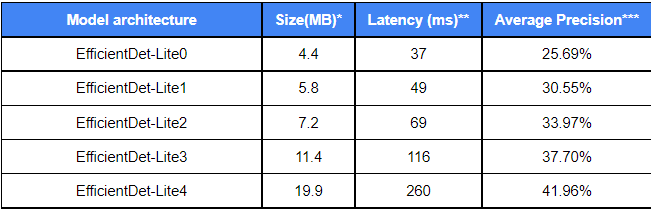

In [ ]:
model = object_detector.ObjectDetector.create(train_data=train_ds, #train dataset
                                             model_spec=spec, #model specification
                                             epochs=100, #training epochs
                                             validation_data = val_ds, #validation subset
                                             batch_size= 8, #default = 64, was using 8 earlier - 8,16,32,64,...
                                             train_whole_model=True, #Train whole model or just layers that are not freezed. 
                                             )

NameError: ignored

Create another folder for test data
train, val, test in 70 20 10 %

In [ ]:
model.evaluate(val_ds, batch_size=8) #test_ds

15/15 [==============================] - 14s 514ms/step



{'AP': 0.6612387,
 'AP50': 0.8854853,
 'AP75': 0.7387363,
 'AP_/handgun': 0.5990101,
 'AP_/rifle': 0.72346723,
 'APl': 0.68516153,
 'APm': 0.44253153,
 'APs': -1.0,
 'ARl': 0.7817802,
 'ARm': 0.6125,
 'ARmax1': 0.6275406,
 'ARmax10': 0.74998754,
 'ARmax100': 0.7661673,
 'ARs': -1.0}

Export

In [ ]:
model.export(export_dir='.')

In [ ]:
model.export(export_dir='.', export_format=[ExportFormat.SAVED_MODEL, ExportFormat.LABEL])

For downloading saved model
  Create a zip & download

In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/assets/ (stored 0%)
  adding: content/saved_model/saved_model.pb (deflated 91%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.index (deflated 85%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 8%)


-----------------------------------------------------------

# ***Doesn't Work***

Test TFLite model & compare against previous evaluation

In [ ]:
model.evaluate_tflite('model.tflite', test_ds)

116/116 [==============================] - 1092s 9s/step



{'AP': 0.64455557,
 'AP50': 0.881808,
 'AP75': 0.7335304,
 'AP_/handgun': 0.58378065,
 'AP_/rifle': 0.7053305,
 'APl': 0.66789955,
 'APm': 0.45696878,
 'APs': -1.0,
 'ARl': 0.7383746,
 'ARm': 0.5642857,
 'ARmax1': 0.605231,
 'ARmax10': 0.71309614,
 'ARmax100': 0.72092384,
 'ARs': -1.0}

----------------------------------------------

## (Optional) Test the TFLite model on your image

You can test the trained TFLite model using images from the internet.
* Replace the `INPUT_IMAGE_URL` below with your desired input image.
* Adjust the `DETECTION_THRESHOLD` to change the sensitivity of the model. A lower threshold means the model will pickup more objects but there will also be more false detection. Meanwhile, a higher threshold means the model will only pickup objects that it has confidently detected.

Although it requires some of boilerplate code to run the model in Python at this moment, integrating the model into a mobile app only requires a few lines of code.

**Run THIS**

OTHERWISE the next code block will give error

In [ ]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = 'model.tflite'

# Load the labels into a list
classes = ['???'] * model.model_spec.config.num_classes
label_map = model.model_spec.config.label_map
for label_id, label_name in label_map.as_dict().items():
  classes[label_id-1] = label_name

# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

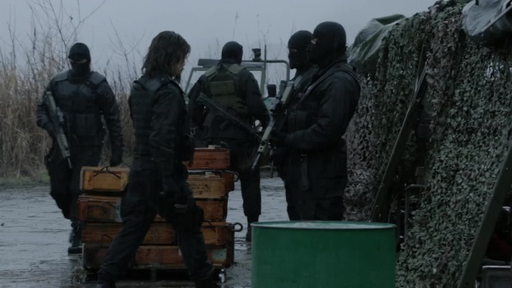

In [ ]:
#@title Run object detection and show the detection results

INPUT_IMAGE_URL = "http://www.imfdb.org/images/thumb/8/8c/Arrow_guarded_camp_tent.jpg/600px-Arrow_guarded_camp_tent.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.3 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)

USE this website to test for images
http://www.imfdb.org/wiki/Assassination_of_Trotsky,_The
.jpg url of images in there